# Problem Set 3

In [3]:
# Step 1
import pandas as pd

# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter='|')

# Step 4
mean_age = users.groupby('occupation').age.mean()
print(mean_age)

# Step 5
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

users['gender_n'] = users['gender'].apply(gender_to_numeric)
male_ratio = users.groupby('occupation').gender_n.sum() / users.occupation.value_counts() * 100
male_ratio = male_ratio.sort_values(ascending=False)
print(male_ratio)

# Step 6
min_age = users.groupby('occupation').age.min()
max_age = users.groupby('occupation').age.max()
print(min_age)
print(max_age)

# Step 7
mean_age_sex = users.groupby(['occupation', 'gender']).age.mean()
print(mean_age_sex)

# Step 8
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100
occup_gender.loc[:, 'gender']
print(occup_gender.loc[:, 'gender'])

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writ

In [8]:
# Define pipeline
def my_pipeline():
    # Step 1
    import pandas as pd

    # Step 2
    url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
    euro12 = pd.read_csv(url)

    # Step 4
    goals = euro12["Goals"]

    # Step 5
    num_teams = euro12["Team"].nunique()

    # Step 6
    num_cols = euro12.shape[1]

    # Step 7
    discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

    # Step 8
    discipline = discipline.sort_values(["Red Cards", "Yellow Cards"], ascending=[False, False])

    # Step 9
    mean_yellow_cards = discipline["Yellow Cards"].mean()

    # Step 10
    six_goals = euro12[euro12["Goals"] > 6]

    # Step 11
    teams_with_G = euro12[euro12["Team"].str.startswith("G")]

    # Step 12
    first_seven_cols = euro12.iloc[:, :7]

    # Step 13
    all_except_last_three_cols = euro12.iloc[:, :-3]

    # Step 14
    eng_it_rus = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]
    
    # Return dictionary containing results
    return {
        "goals": goals,
        "num_teams": num_teams,
        "num_cols": num_cols,
        "discipline": discipline,
        "mean_yellow_cards": mean_yellow_cards,
        "six_goals": six_goals,
        "teams_with_G": teams_with_G,
        "first_seven_cols": first_seven_cols,
        "all_except_last_three_cols": all_except_last_three_cols,
        "eng_it_rus": eng_it_rus
    }

# Run pipeline and store results
results = my_pipeline()

# Print results
print(results["goals"])
print(results["num_teams"])
print(results["num_cols"])
print(results["discipline"])
print(results["mean_yellow_cards"])
print(results["six_goals"])
print(results["teams_with_G"])
print(results["first_seven_cols"])
print(results["all_except_last_three_cols"])
print(results["eng_it_rus"])







0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
16
35
                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4   

In [9]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3
df = pd.concat([series1, series2, series3], axis=1)

# Step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)

# Step 6
print(bigcolumn[0:299])  # It will print all values from index 0 to 298

# Step 7
df = bigcolumn.reindex(range(300))


0          3
1          1
2          2
3          3
4          2
       ...  
294    27452
295    23414
296    18840
297    13349
298    17443
Length: 299, dtype: int32


In [32]:
import pandas as pd

# Step 1
with open('wind.txt') as f:
    lines = f.readlines()

# Step 2
data = pd.DataFrame([line.split() for line in lines[2:]], dtype=float)

# Step 3
data.iloc[:, 0:3] = data.iloc[:, 0:3].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y %m %d'))
data = data.set_index(data.columns[0])
data = data.iloc[:, 2:]

# Step 4
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)

# Step 5
data = data.fillna(method='ffill')

# Step 6
missing_count = data.isna().sum()

# Step 7
non_missing_count = data.notna().sum().sum()

# Step 8
mean_windspeed = data.mean().mean()

# Step 9
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

# Step 10
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

# Step 11
january_data = data[data.index.month == 1]
january_data.groupby(january_data.index.year).mean()

# Step 12
yearly_data = data.resample('Y').mean()

# Step 13
monthly_data = data.resample('M').mean()

# Step 14
weekly_data = data.resample('W').mean()

# Step 15
weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data.min(axis=1)
weekly_stats['max'] = weekly_data.max(axis=1)
weekly_stats['mean'] = weekly_data.mean(axis=1)
weekly_stats['std'] = weekly_data.std(axis=1)
weekly_stats = weekly_stats.head(52) # first 52 weeks only

# Print the results
print("Missing values:\n", missing_count)
print("\nNon-missing values count:", non_missing_count)
print("\nMean wind speed:", mean_windspeed)
print("\nLocation stats:\n", loc_stats)
print("\nDaily stats:\n", day_stats)
print("\nJanuary data:\n", january_data)
print("\nYearly data:\n", yearly_data)
print("\nMonthly data:\n", monthly_data)
print("\nWeekly data:\n", weekly_data)
print("\nWeekly stats:\n", weekly_stats)




Missing values:
 3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

Non-missing values count: 78875

Mean wind speed: 10.227454654087419

Location stats:
      min    max       mean       std
3   0.67  35.80  12.361990  5.617385
4   0.21  33.37  10.643296  5.267229
5   1.50  33.84  11.659684  5.008228
6   0.00  28.46   6.304216  3.605419
7   0.13  37.54  10.456367  4.935939
8   0.00  26.16   7.091832  3.968837
9   0.00  30.37   9.795717  4.977318
10  0.00  31.08   8.494820  4.499125
11  0.00  25.88   8.496298  4.168755
12  0.04  28.21   8.706216  4.503903
13  0.13  42.38  13.120189  5.835104
14  0.67  42.54  15.598832  6.698935

Daily stats:
              min    max       mean       std
0                                           
1970-01-01  6.50  17.54  11.336364  3.188994
1970-01-01  6.17  18.50  11.508333  3.540888
1970-01-01  1.79  11.75   6.619167  3.198126
1970-01-01  6.17  13.33  10.630000  2.445356
1970-01-01  4.42  13

In [34]:
# Step 1
import pandas as pd

# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter = '\t')

# Step 3
chipo = pd.read_csv(url, delimiter = '\t')

# Step 4
print(chipo.head(10))

# Step 5
print("Number of observations:", len(chipo))

# Step 6
print("Number of columns:", len(chipo.columns))

# Step 7
print("Columns:", chipo.columns)

# Step 8
print("Index:", chipo.index)

# Step 9
item_counts = chipo['item_name'].value_counts()
most_ordered_item = item_counts.index[0]
print("Most-ordered item:", most_ordered_item)

# Step 10
most_ordered_item_quantity = item_counts[0]
print("Quantity of most-ordered item:", most_ordered_item_quantity)

# Step 11
choice_counts = chipo['choice_description'].value_counts()
most_ordered_choice = choice_counts.index[0]
print("Most-ordered choice:", most_ordered_choice)

# Step 12
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

# Step 13
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print("Item price type:", chipo['item_price'].dtype)

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print("Item price type after lambda:", chipo['item_price'].dtype)

# Step 14
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

# Step 15
total_orders = chipo['order_id'].nunique()
print("Total orders:", total_orders)

# Step 16
average_revenue_per_order = revenue / total_orders
print("Average revenue per order:", average_revenue_per_order)

# Step 17
num_items_sold = chipo['item_name'].nunique()
print("Number of different items sold:", num_items_sold)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

C:\Users\14375\AppData\Local\Temp\ipykernel_8152\1832048825.py:45: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


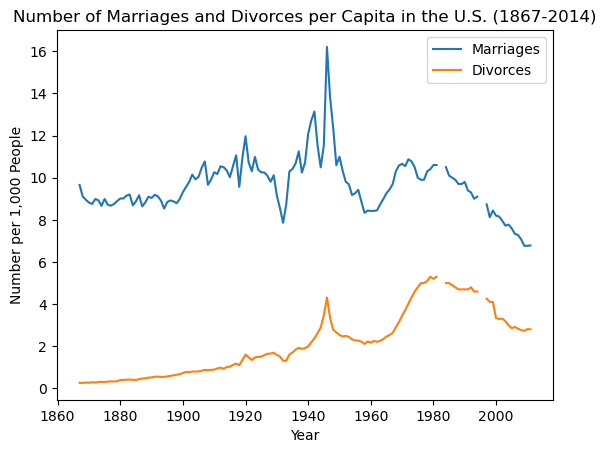

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the data
marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col=0)

# Step 2: Clean and process the data
marriage_divorce_data = marriage_divorce_data.loc[1867:2014]
marriage_divorce_data = marriage_divorce_data.div(marriage_divorce_data['Population'], axis=0) * 1000 # Calculate per capita values
marriage_divorce_data = marriage_divorce_data.drop('Population', axis=1) # Remove population column

# Step 3: Plot the data
plt.plot(marriage_divorce_data['Marriages'], label='Marriages')
plt.plot(marriage_divorce_data['Divorces'], label='Divorces')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number per 1,000 People')
plt.legend()
plt.show()


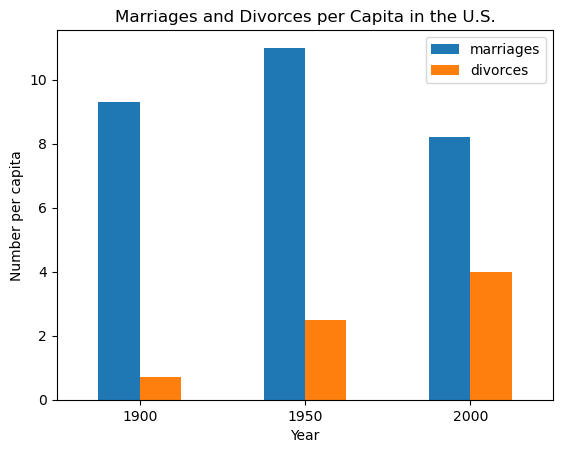

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# create a dataframe with the data
data = {'year': [1900, 1950, 2000],
        'marriages': [9.3, 11.0, 8.2],
        'divorces': [0.7, 2.5, 4.0]}
df = pd.DataFrame(data)

# plot the bar chart
ax = df.plot.bar(x='year', y=['marriages', 'divorces'], rot=0)

# set the labels for the chart
ax.set_xlabel("Year")
ax.set_ylabel("Number per capita")
ax.set_title("Marriages and Divorces per Capita in the U.S.")

# show the chart
plt.show()


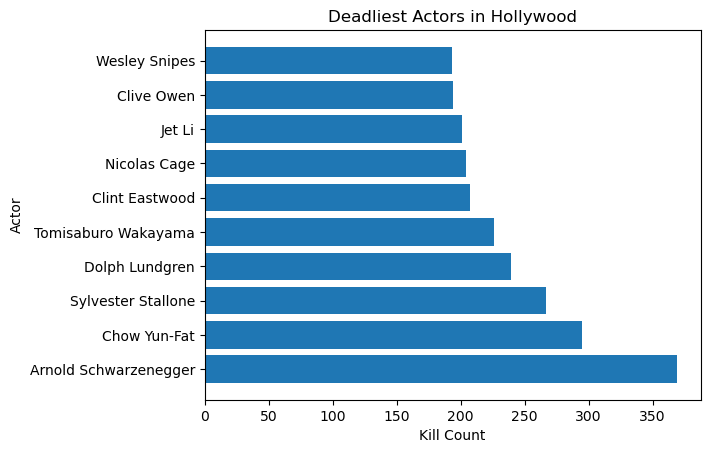

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file into a pandas DataFrame
df = pd.read_csv('actor_kill_counts.csv')

# sort the DataFrame by kill count
df = df.sort_values(by='Count', ascending=False)

# create horizontal bar chart
plt.barh(df['Actor'], df['Count'])

# set axis labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# display the plot
plt.show()


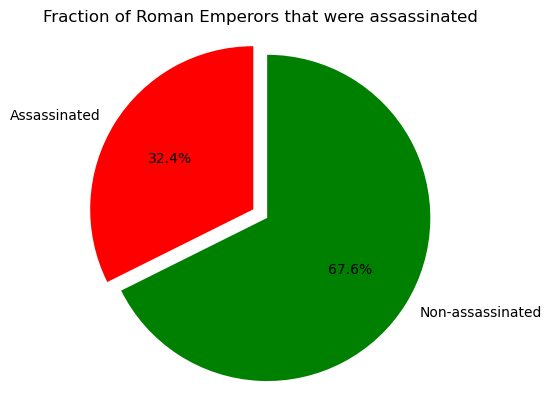

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# load data from CSV file
df = pd.read_csv('roman-emperor-reigns.csv')

# count the number of assassinated and non-assassinated emperors
num_assassinated = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]
num_non_assassinated = df[df['Cause_of_Death'] != 'Assassinated'].shape[0]

# create a pie chart
labels = ['Assassinated', 'Non-assassinated']
sizes = [num_assassinated, num_non_assassinated]
colors = ['red', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Fraction of Roman Emperors that were assassinated')
plt.show()


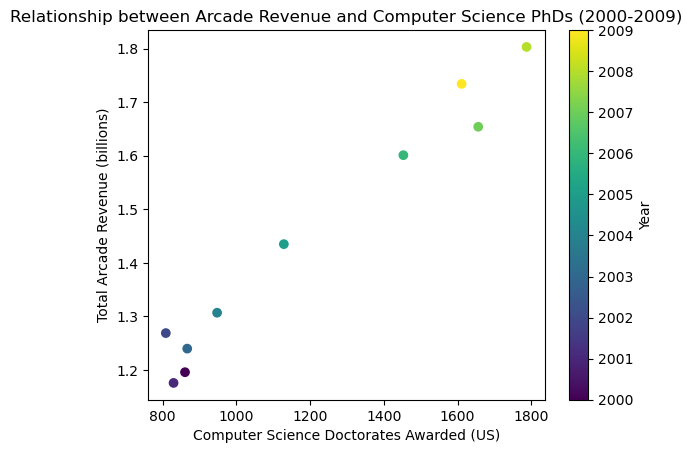

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from csv file
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# create scatter plot
plt.scatter(data['Computer Science Doctorates Awarded (US)'], data['Total Arcade Revenue (billions)'], c=data['Year'], cmap='viridis')

# add labels and title
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')

# add colorbar
cbar = plt.colorbar()
cbar.set_label('Year')

# show plot
plt.show()
